# Problem Set #1 - Stevenson

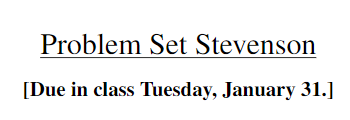

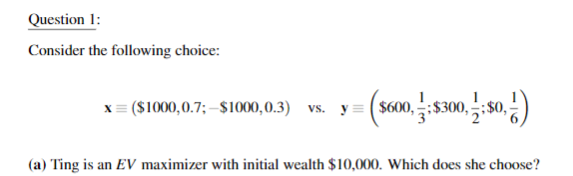

Ting will choose the highest expected value, which is multiplying outcome cash value by probability. His initial wealth is irrelevant.

$$EV(x) = 1000*0.7 - 1000*0.3 = 700-300=400$$
$$EV(y) = 600*\frac{1}{3} + 300*\frac{1}{2} + 0 = 200+150 = 350$$
Ting will choose X since her expected value is higher in that case



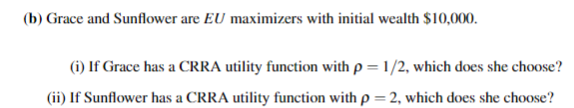

The CRRA utility function is given by:

$ EU(W) = \begin{cases} \frac{W^{1-\rho}}{1-\rho} & \text{if } \rho \neq 1 \\ \ln(W) & \text{if } \rho = 1 \end{cases} $

Thus Grace's CRRA function is 
$ EU(W) = \frac{W^{1-1/2}}{1-1/2} = 2W^{1/2} $ <br>

and Sunflower's is 
$ U(W) = \frac{W^{1-2}}{1-2} = -W^{-1} $

The possible outcomes of x and y are

$
x:\\
70\% \space \$10000+\$1000 = \$11000\\
30\% \space \$10000-\$1000 = \$9000
$

$
y:\\
33\% \space \$10000+\$600=\$10600 \\
50\% \space \$10000+\$300=\$10300 \\
16\% \space \$10000
$

Using Grace's CRRA function, her EU for x and y are

$
EU(x) = .7 * 2(11000)^{\frac{1}{2}} + .3 * 2(9000)^{\frac{1}{2}} =  203.75\\
EU(y) = \frac{1}{3} * 2(10600)^{\frac{1}{2}} + \frac{1}{2} *2(10300)^{\frac{1}{2}} + \frac{1}{6}* 2(10000)^{\frac{1}{2}} = 203.46
$

As such Grace will choose x

Sunflower chooses the opposite, as shown by

$
EU(x) = .7 * -(11000)^{-1} + .3 * -(9000)^{-1} = -9.697e-5 \\
EU(y) = \frac{1}{3} (-(10600)^{-1}) + \frac{1}{2} (-(10300)^{-1}) + \frac{1}{6} (-(10000)^{-1})=-9.666e-5
$

Since EU(y) is less small, Sunflower prefers EU(y)

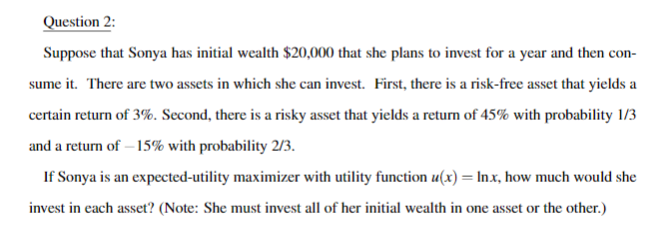

In [1]:
import numpy as np
w1 = 20000*1.03

w2 = [20000*1.45, 20000*(1-.15)]
p2 = [1/3,2/3]

def u(w,p):
    return( p * np.log(w))

eu1 = u(w1,1)
eu2 = u(w2[0],p2[0]) + u(w2[1],p2[1])

print(eu1, eu2)
1-.15

9.933046354777673 9.918996118348439


0.85

I believe a bit of calculus is required for this one. We will find when the derivative of total expected utility equals zero. Lets call option 1 x and option 2 y.

$w_1 + w_2 = 20000$

$EU_x(w_1) = ln(w_1*1.03) \\
EU_y(w_2) = \frac{1}{3} ln(w_2*1.45) + \frac{2}{3} ln(w_2*.85) \\
EU = ln(w_1*1.03) + \frac{1}{3} ln(w_2*1.45) + \frac{2}{3} ln(w_2*.85) $

I don't see any reason to simplify these logarithms, this isn't a math class after all.


In [2]:
from sympy import symbols, Eq, solve, ln

w1, w2, lambda_ = symbols('w1 w2 lambda')

EU = ln(w1 * 1.03) + (1/3) * ln(w2 * 1.45) + (2/3) * ln(w2 * 0.85)
Eq(w1 + w2, 20000)

L = EU - lambda_ * (w1 + w2 - 20000)

dw1 = L.diff(w1)
dw2 = L.diff(w2)
dlambda = L.diff(lambda_)

solution = solve((dw1, dw2, dlambda), (w1, w2, lambda_))

solution


[(10000.0000000000, 10000.0000000000, 0.000100000000000000)]

Okay maybe it would have been easier to simplify the logarithms. The best way for sonya to optimize her utility would be to invest equally into each asset

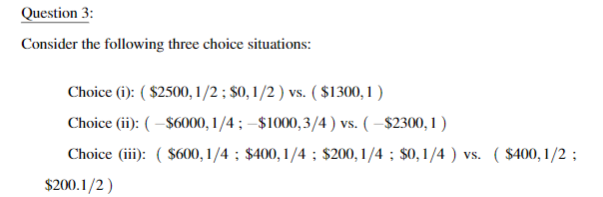

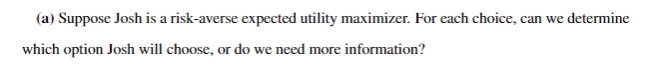

Risk averse: Josh prefers EV(x) to x, which would be reflected in his utility function if we had one for him. Unfortunately we do not, so we need more information to know his preferred choice. 

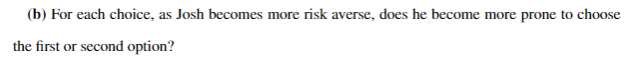

In each situation a risk-averse josh prefers the second option over the first, since they all reduce the chances of a worst possible outcome which risk-aversion tends to place more weight on.

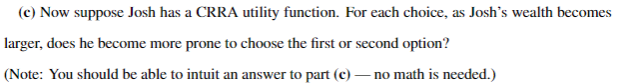

Josh's increasing wealth causes him to become less worried about losses and as a result he begins to value the first option over the second for each example